In [236]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import giapy

from giapy.numTools.solvde import solvde
from giapy.earth_tools.elasticlove import *

prem = giapy.earth.earthParams.EarthParams()

In [421]:
%run ../giapy/earth_tools/viscouslove.py

In [422]:
Nz = 300
zarray_smalln = (np.log10(np.linspace(1., 10**0.1, Nz))*(1-prem.rCore)/0.1 + prem.rCore)*prem.norms['r']
zarray_largen = (np.log10(np.linspace(1., 10**2, Nz))*(1-prem.rCore)/2 + prem.rCore)*prem.norms['r']

n = 2

In [423]:
difeqVisc = SphericalViscSMat(n, zarray_smalln, prem, Q=1)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1e-12, 1e-12, 1e+02, 1e+01])
slowc = 1
start = (scalvVisc*np.ones((4, len(zarray_smalln))).T).T
yV = solvde(500, 1e-14, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

Iter.
Error      FAC        
0       
9.702862   0.103062   
Iter.
Error      FAC        
1       
8.702862   0.114905   
Iter.
Error      FAC        
2       
7.702862   0.129822   
Iter.
Error      FAC        
3       
6.702862   0.149190   
Iter.
Error      FAC        
4       
5.702862   0.175351   
Iter.
Error      FAC        
5       
4.702862   0.212636   
Iter.
Error      FAC        
6       
3.702862   0.270061   
Iter.
Error      FAC        
7       
2.702862   0.369978   
Iter.
Error      FAC        
8       
1.702862   0.587246   
Iter.
Error      FAC        
9       
0.702862   1.000000   
Iter.
Error      FAC        
10      
0.000000   1.000000   


0


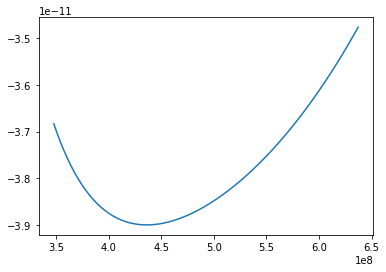

In [424]:
i += 1
if i > 3: i=0
print i
plt.plot(zarray_smalln, yV[i])

In [425]:
difeqElas = SphericalElasSMat(n, zarray_smalln, prem, Q=2)
indexv = np.array([3,4,0,1,5,2])
scalvElas = np.array([1e-02, 1e-02, 1e+02, 1e+01, 1e+01, 1e-07])
slowc = 1
start = (scalvElas*np.ones((6, len(zarray_smalln))).T).T
yE = solvde(500, 1e-10, slowc, scalvElas, indexv, 3,
                            start, difeqElas, True, True)

Iter.
Error      FAC        
0       
3.788820   0.263934   
Iter.
Error      FAC        
1       
2.788820   0.358575   
Iter.
Error      FAC        
2       
1.788820   0.559028   
Iter.
Error      FAC        
3       
0.788820   1.000000   
Iter.
Error      FAC        
4       
0.000000   1.000000   


In [426]:
b = gen_viscb(n, yE.y, np.zeros_like(zarray_smalln_norm), 
              prem, 0.5*(zarray_smalln[1:] + zarray_smalln[:-1]), Q=2)

In [427]:
difeqVisc = SphericalViscSMat(n, zarray_smalln, 
                                       prem, Q=1, b=b)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1e-12, 1e-12, 1e+02, 1e+01])
slowc = 0.5
start = (scalvVisc*np.ones((4, len(zarray_smalln_norm))).T).T
yVb = solvde(500, 1e-14, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

Iter.
Error      FAC        
0       
3.012526   0.165974   
Iter.
Error      FAC        
1       
2.512526   0.199003   
Iter.
Error      FAC        
2       
2.012526   0.248444   
Iter.
Error      FAC        
3       
1.512526   0.330573   
Iter.
Error      FAC        
4       
1.012526   0.493814   
Iter.
Error      FAC        
5       
0.512526   0.975560   
Iter.
Error      FAC        
6       
0.012526   1.000000   
Iter.
Error      FAC        
7       
0.000000   1.000000   


In [428]:
paramCore = prem.getParams(prem.rCore)
rhoC = paramCore['den']
gC = paramCore['grav']
denC = prem.denCore

re = prem.norms['r']

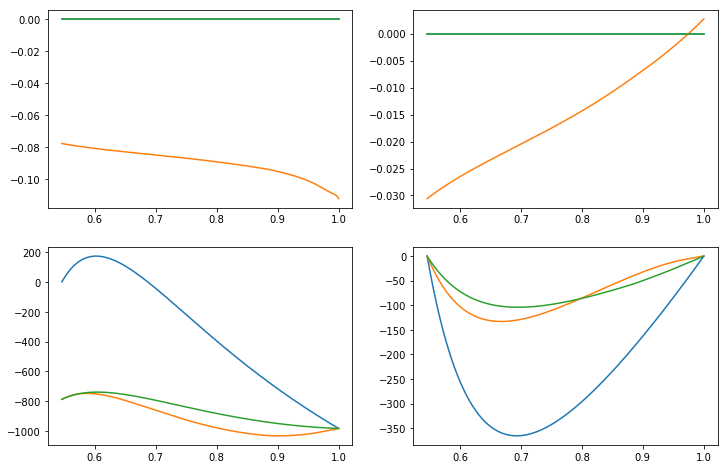

In [430]:
i=2
#i += 1
#if i > 3: i=0
#print i
fig, axs = plt.subplots(2,2, figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    ax.plot(zarray_smalln_norm, yV[i]);
    ax.plot(zarray_smalln_norm, yE[i]);
    ax.plot(zarray_smalln_norm, yVb[i]);

In [342]:
yV[2,0]

0.0

In [343]:
yE[2,0]

-1410.7038885812303

In [344]:
yVb[2,0]

-1410.7038885812306

In [345]:
yE0, yV0 = giapy.earth.earthIntegrator.get_t0_guess(prem, zarray_smalln_norm)

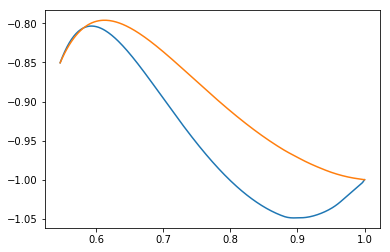

In [401]:
plt.plot(zarray_smalln_norm, yE0[2])
plt.plot(zarray_smalln_norm, yV0[2])

In [269]:
Nz = 300
zarray_smalln_norm = (np.log10(np.linspace(1., 10**0.1, Nz))*(1-prem.rCore)/0.1 + prem.rCore)
zarray_largen_norm = (np.log10(np.linspace(1., 10**10, Nz))*(1-prem.rCore)/10 + prem.rCore)

difeqVisc = SphericalViscSMat_norm(n, zarray_smalln_norm, prem, Q=1)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1, 1, 1, 1])
slowc = 1
start = (scalvVisc*np.ones((4, len(zarray_smalln_norm))).T).T
yVn = solvde(500, 1e-14, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

Iter.
Error      FAC        
0       
0.362045   1.000000   
Iter.
Error      FAC        
1       
0.000000   1.000000   


In [199]:
difeqElas = SphericalElasSMat_norm(n, zarray_smalln_norm, prem, Q=1)
indexv = np.array([3,4,0,1,5,2])
scalvElas = np.array([1, 1, 1, 1, 1, 1])
slowc = 1
start = (scalvElas*np.ones((6, len(zarray_smalln_norm))).T).T
yE2nE = solvde(500, 1e-12, slowc, scalvElas, indexv, 3,
                            start, difeqElas, True)

Iter.
Error      FAC        
0       
1.269190   0.787904   
Iter.
Error      FAC        
1       
0.269190   1.000000   
Iter.
Error      FAC        
2       
0.000000   1.000000   


0


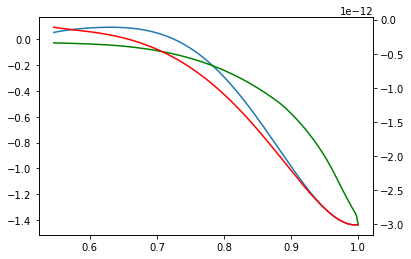

In [233]:
i += 1
if i > 3: i=0
print i
plt.plot(zarray_smalln_norm, yE2n[i]);
plt.plot(zarray_smalln_norm, yE2nE[i], c='g');
plt.twinx();
plt.plot(zarray_smalln_norm, yE2[i], c='r');

In [159]:
%run ../giapy/earth_tools/viscouslove.py

In [160]:
zmid = 0.5*(zarray_smalln_norm[1:] + zarray_smalln_norm[:-1])
uV = np.zeros_like(zarray_smalln_norm)
b = gen_viscb(n, yE2nE.y.T, uV, prem, zmid)

In [161]:
difeqVisc = SphericalViscSMat_norm(n, zarray_smalln_norm, 
                                       prem, Q=1, b=b)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1, 1, 1, 1])
slowc = 1
start = (scalvVisc*np.ones((4, len(zarray_smalln_norm))).T).T
yE2nb = solvde(500, 1e-10, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

Iter.
Error      FAC        
0       
0.263044   1.000000   
Iter.
Error      FAC        
1       
0.000000   1.000000   


3


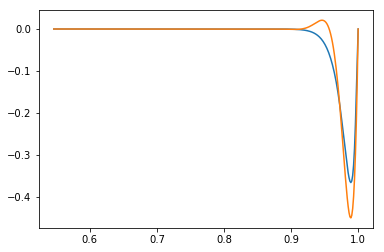

In [179]:
i += 1
if i > 3: i=0
print i
plt.plot(zarray_smalln_norm, yE2nE[i])
plt.plot(zarray_smalln_norm, yE2nb[i])

2


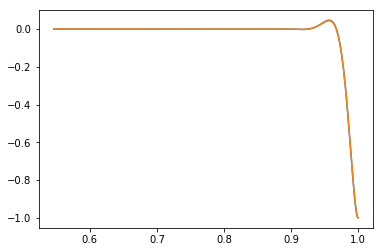

In [174]:
i += 1
if i > 3: i=0
print i
plt.plot(zarray_smalln_norm, yE2n[i])
plt.plot(zarray_smalln_norm, yE2nb[i])

In [14]:
def exp_pt_density(nz, delta=1., x0=0., x1=1., normed_delta=True):
    """Generate a point distribution with exponential spacing.

    Parameters
    ----------
    nz : integer - number of points to generate
    delta : float
        The exponential rate of increase (decrease if negative) of point 
        density. It is assumed to be normalized to the distance x1-x0 unless
        normed_delta=False. (Default 1.)
    x0, x1 : the range over which to distribute points (Defaults 0 to 1)
    """
    qs = np.arange(nz, dtype=float)
    if normed_delta:
        xs = (x1-x0)*delta * np.log(qs/(nz-1)*(np.exp(1./delta) - 1) + 1) + x0
    else:
        xs = x1* np.log(qs/(nz-1)*(np.exp((x1-x0)/delta) - 1) + 1) + x0
    return xs

In [15]:
Nz = 100
n = 2

zarray = exp_pt_density(Nz, np.log(n)/(n+.5), prem.rCore, 1.)

difeqVisc = SphericalViscSMat_norm(n, zarray, prem, Q=1)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1, 1, 1, 1])
slowc = 1
start = (scalvVisc*np.ones((4, len(zarray))).T).T
yE2nexp = solvde(500, 1e-10, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

Iter.
Error      FAC        
0       
0.336279   1.000000   
Iter.
Error      FAC        
1       
0.000000   1.000000   


In [16]:
qs = exp_pt_density(100, 0.1)

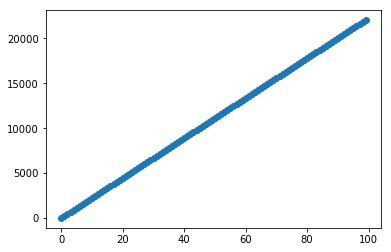

In [17]:
plt.plot(np.exp(qs/0.1), marker='o')

In [18]:
difeqVisc.A.shape

(99, 6, 6)

In [19]:
difeqVisc.smatrix(0, 0, 100, 8, is1, isf, indexv, s, y)

NameError: name 'is1' is not defined